# Exploratory Data Analysis

### 사용 라이브러리

In [10]:
import pandas as pd
import numpy as np

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from libs import get_file_dir

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 일반폐기물재활용률(10-19)

### 1.0 데이터 불러오기

In [11]:
df = pd.read_csv(get_file_dir('refined','일반폐기물재활용률(10-19).csv'))

### 2.0 데이터 탐색 및 전처리

In [12]:
df.info() 

# Not-null, 2520 ROW

# 행정구역별(1), (2)          object
# year (연도)             int64
# 일반폐기물재활용률(%)      object -> float
# 총재활용량(톤/일)         object -> float
# 생활폐기물총발생량(톤/일)  object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구역별(1)   2340 non-null   object
 1   행정구역별(2)   2340 non-null   object
 2   year       2340 non-null   int64 
 3   일반폐기물재활용률  2340 non-null   object
 4   총재활용량      2340 non-null   object
 5   생활폐기물총발생량  2340 non-null   object
dtypes: int64(1), object(5)
memory usage: 109.8+ KB


##### 결측치 처리

In [13]:
# 실질적 결측치 처리

df['일반폐기물재활용률'].unique() # '-' 값 존재 (실질적 결측치)

condition = df['일반폐기물재활용률'] == '-'
df[condition] # 동일한 ROW에 56개 존재

# 신설된 시군구로 인한 결측치 발생 추측
# 결측치 정책: 0으로 대치
df.replace('-', '0', inplace=True)

##### 데이터 변환

In [14]:
# 자료형 변환 (object -> float)

df['year'] = df['year'].astype('object')

df['일반폐기물재활용률'] = df['일반폐기물재활용률'].astype('float')

df['총재활용량'] = df['총재활용량'].astype('float')

df['생활폐기물총발생량'] = df['생활폐기물총발생량'].astype('float')

In [15]:
df.describe() 

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,2340.000000,2340.000000,2340.000000
mean,53.035000,131.879444,220.013974
std,18.476864,139.294137,216.906115
min,0.000000,0.000000,0.000000
25%,42.400000,23.900000,53.775000
50%,55.500000,89.250000,165.900000
75%,66.025000,199.675000,315.175000
max,100.000000,1105.800000,1526.900000


In [16]:
df.corr()

# 생활폐기물총발생량과 총재활용량은 강한 상관관계를 가짐.
# 일반폐기물재활용률 = 생활폐기물총발생량 / 총재활용량

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
일반폐기물재활용률,1.000000,0.498241,0.379290
총재활용량,0.498241,1.000000,0.972267
생활폐기물총발생량,0.379290,0.972267,1.000000


### 3.0 시각적 EDA

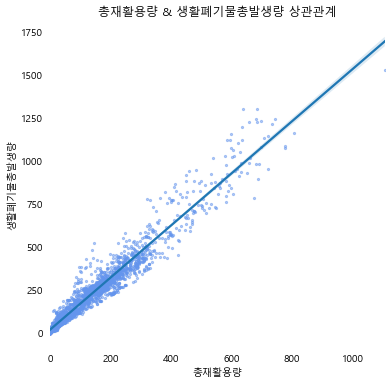

In [17]:
# 데이터 분포 - 총재활용량 & 생활폐기물총발생량 상관관계

plt.figure(figsize=(6, 6))

sns.regplot(x=df["총재활용량"], y=df["생활폐기물총발생량"], fit_reg=True, scatter_kws={"color":'cornflowerblue',"alpha":0.5,"s":5})

plt.title('총재활용량 & 생활폐기물총발생량 상관관계')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.show()

In [68]:
df['행정구역별(1)'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'], dtype=object)

In [53]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=object)

In [60]:
sido_condition = df['행정구역별(1)']=='서울특별시'
df_temp = df[sido_condition].groupby(df['year'])['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량'].mean().reset_index()
df_temp

<ipython-input-60-43b7c50b5c84>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp = df[sido_condition].groupby(df['year'])['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량'].mean().reset_index()


,year,일반폐기물재활용률,총재활용량,생활폐기물총발생량
0,2010,65.252,263.708,400.816
1,2011,61.980,239.728,377.604
2,2012,63.836,240.180,367.572
3,2013,62.384,219.256,342.360
4,2014,66.476,256.956,384.552
5,2015,68.776,260.056,377.548
6,2016,67.780,261.988,384.320
7,2017,66.876,247.208,368.692
8,2018,67.872,258.276,379.716
9,2019,66.104,261.416,393.896


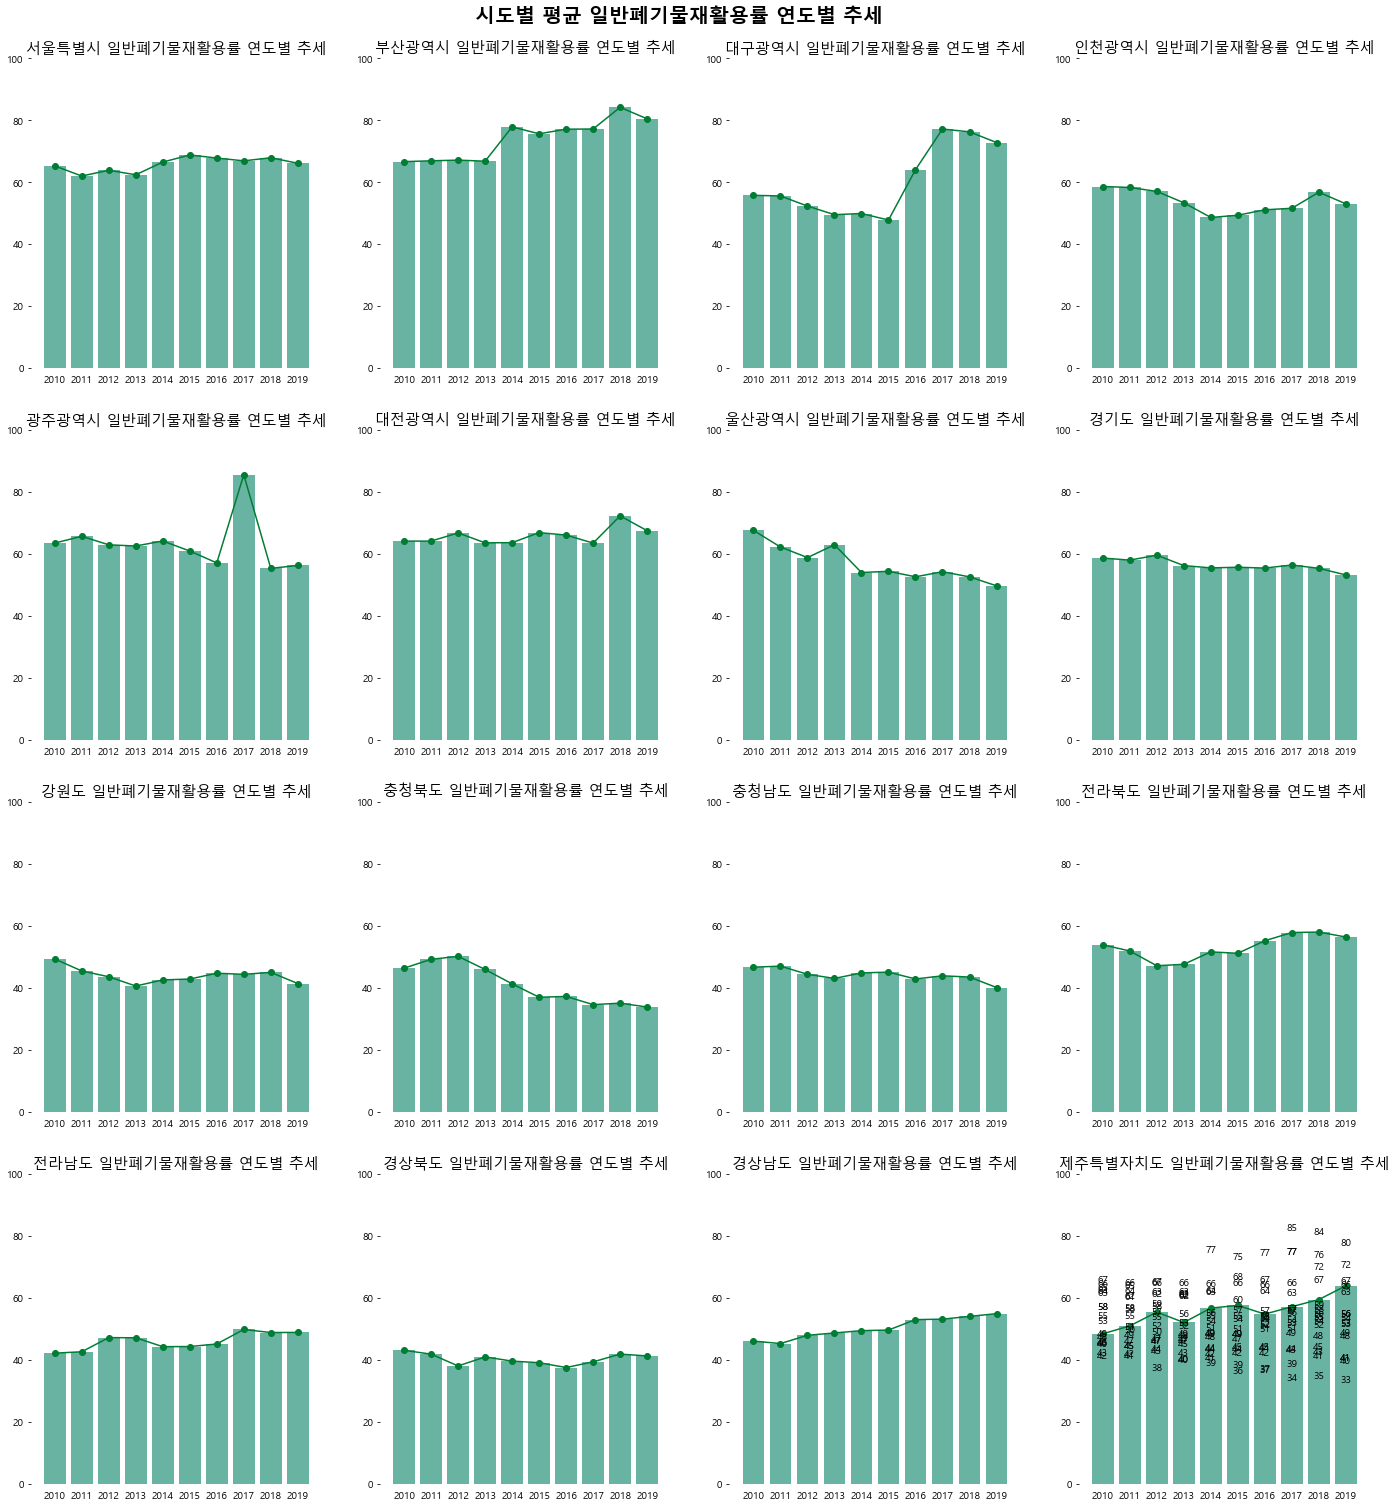

In [182]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 24))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    plot1 = axs[ax, ay].bar(df_temp['year'], df_temp['일반폐기물재활용률'], color='#69b3a2')
    axs[ax, ay].plot(df_temp['year'], df_temp['일반폐기물재활용률'], color='#007d34', marker='o')
    axs[ax, ay].set_title('{} 일반폐기물재활용률 연도별 추세'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].spines['left'].set_visible(False)
    axs[ax, ay].spines['bottom'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

    for value in plot1:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                0.95*height,'%d' % int(height), ha='center', va='bottom')

for sax in axs.flat:
    sax.set_yticks(list(range(0, 101, 20)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 평균 일반폐기물재활용률 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.95)
plt.show()

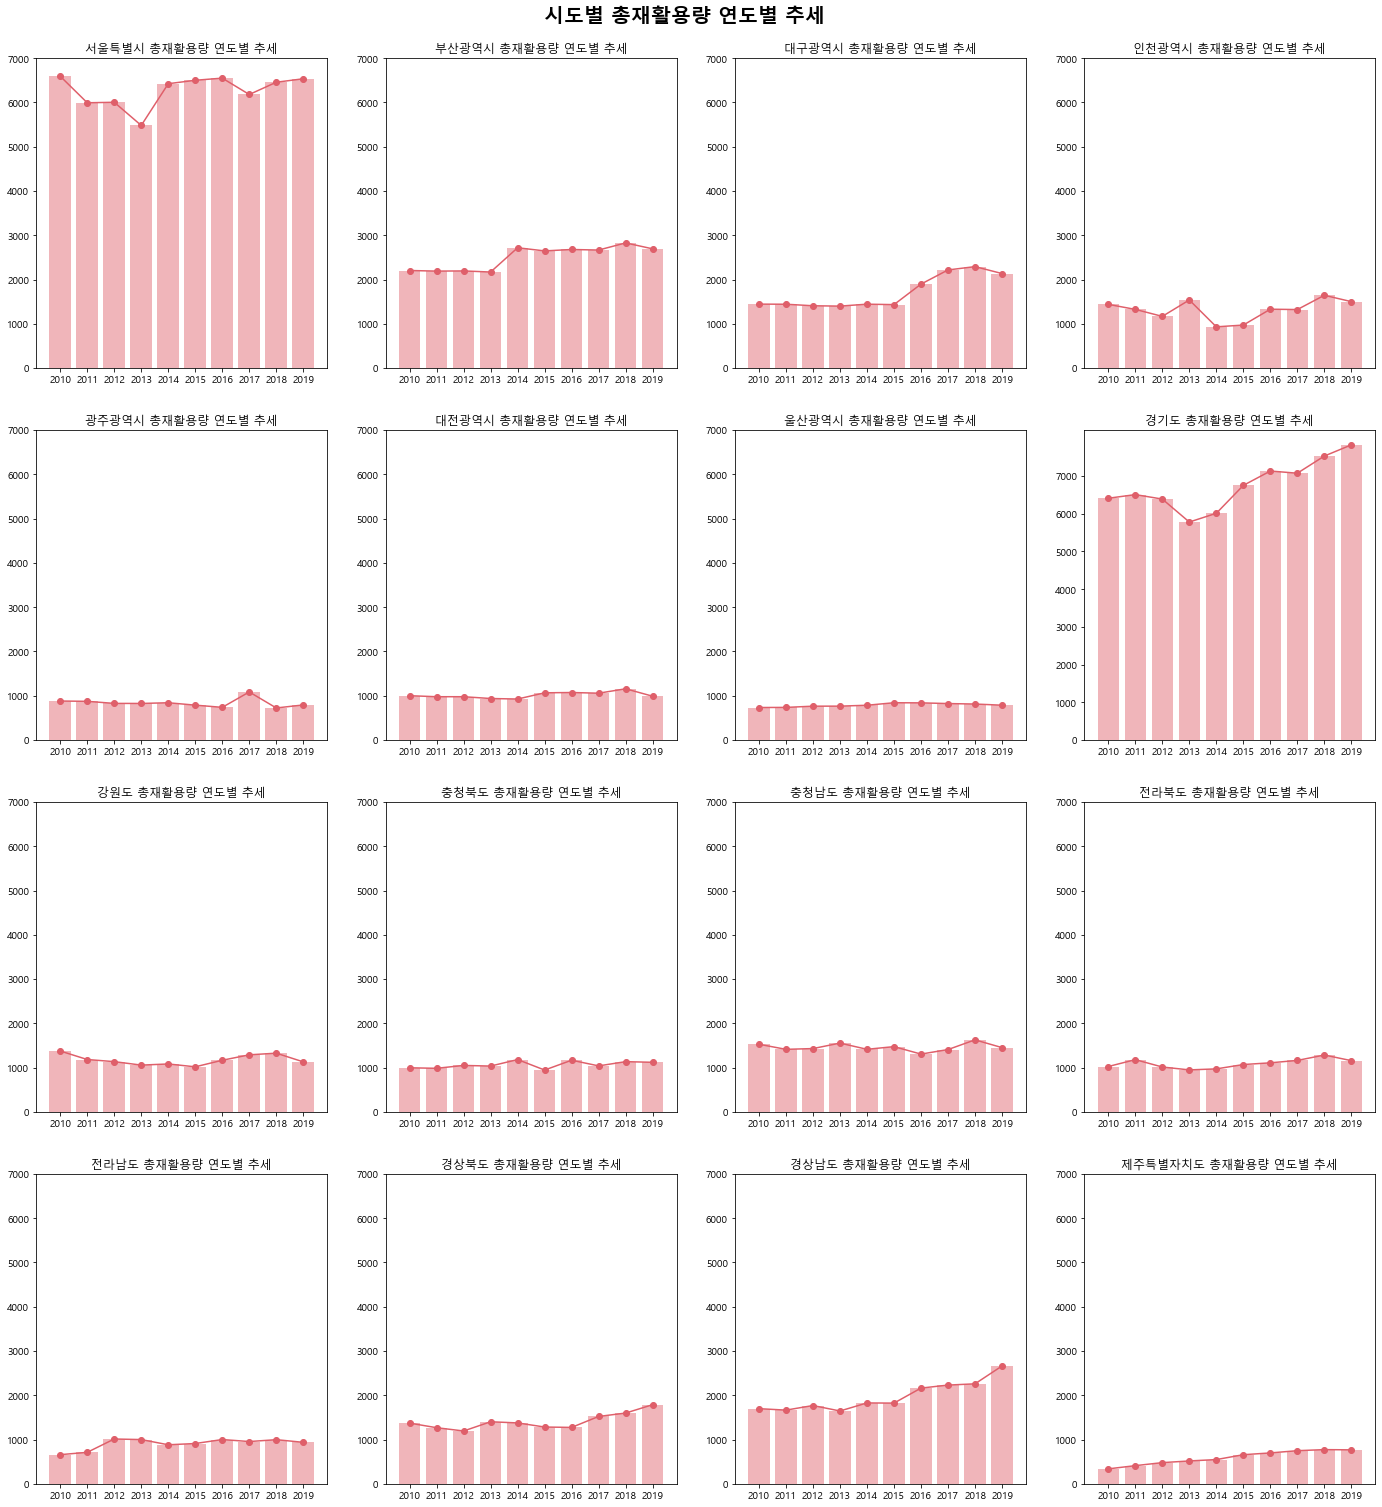

In [133]:
# 시도별 총재활용량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 24))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['총재활용량'], color='#f0b5ba')
    axs[ax, ay].plot(df_temp['year'], df_temp['총재활용량'], color='#df5f6a', marker='o')
    axs[ax, ay].set_title('{} 총재활용량 연도별 추세'.format(i))
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 8000, 1000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 총재활용량 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.95)
plt.show()

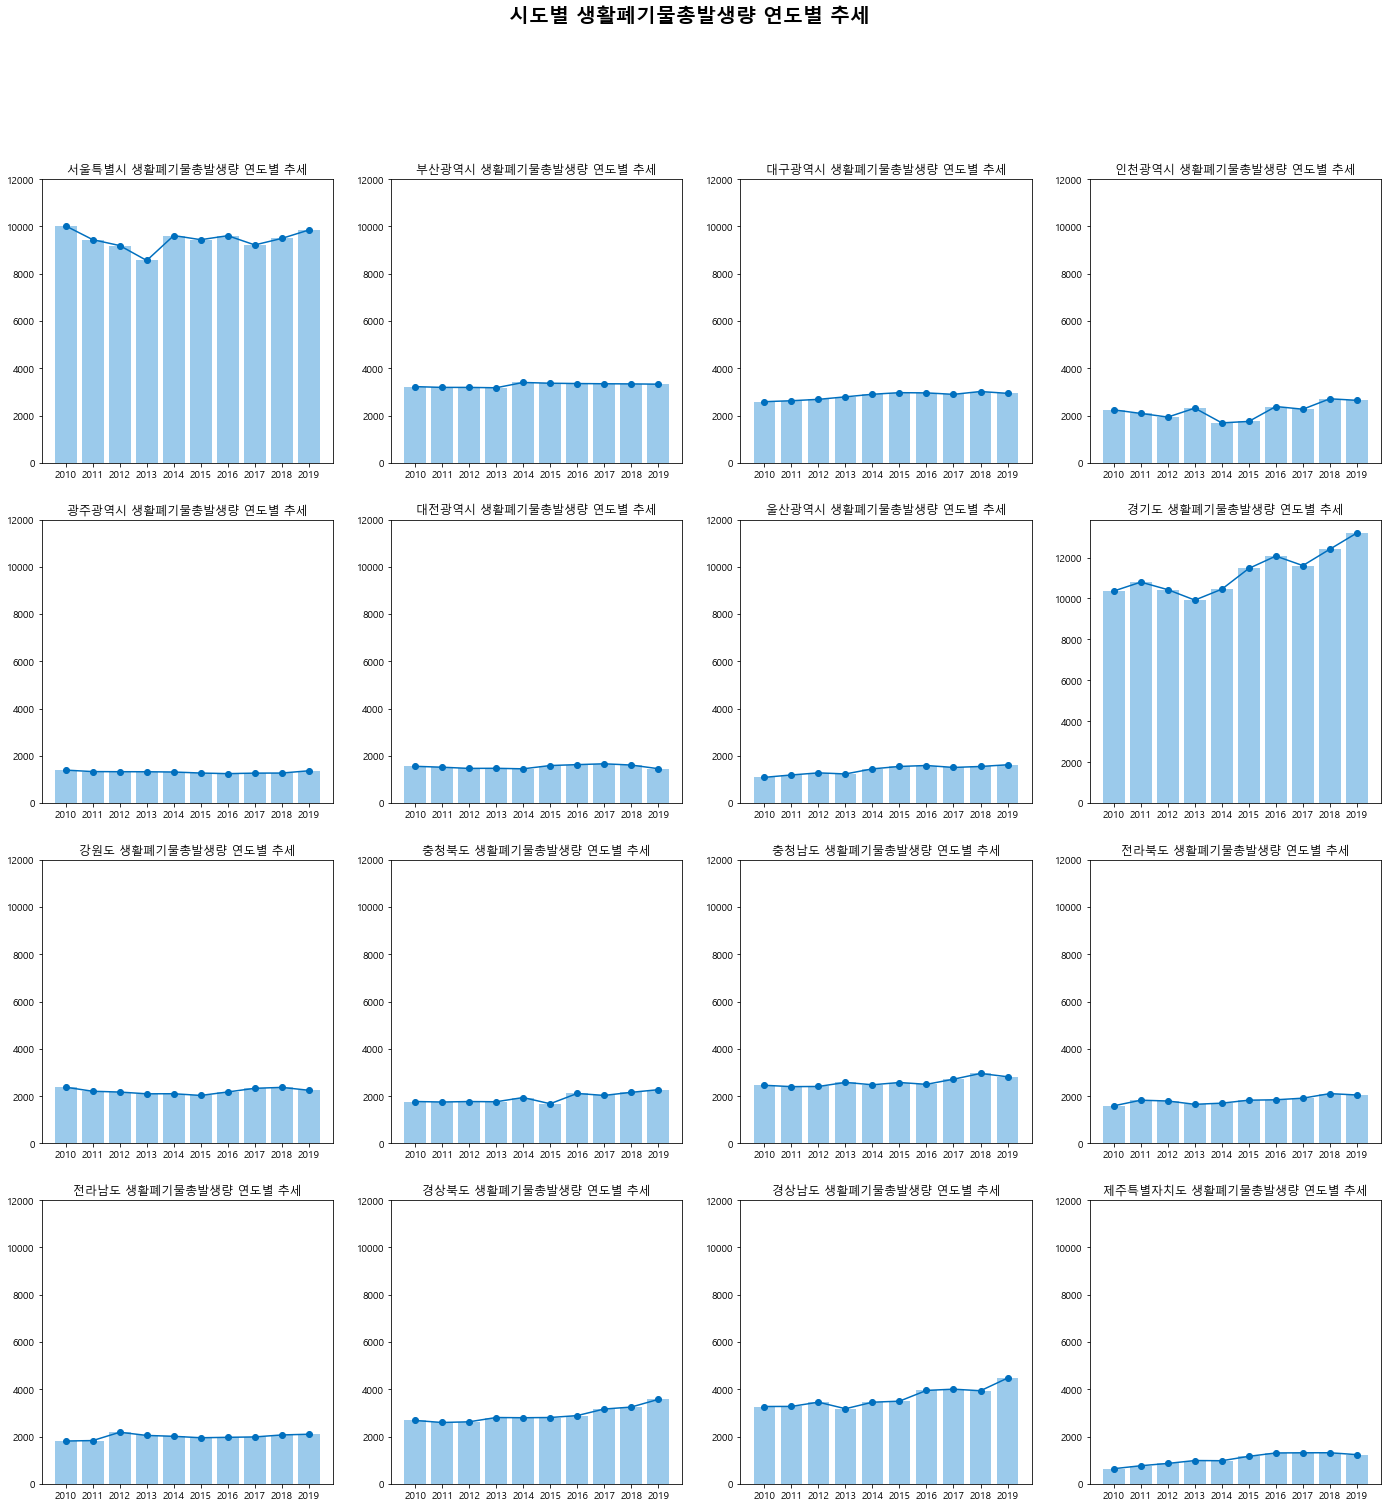

In [132]:
# 시도별 생활폐기물총발생량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 24))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['생활폐기물총발생량'], color='#9bcaeb')
    axs[ax, ay].plot(df_temp['year'], df_temp['생활폐기물총발생량'], color='#006fbe', marker='o')
    axs[ax, ay].set_title('{} 생활폐기물총발생량 연도별 추세'.format(i))
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세', fontsize=20, weight='bold')
plt.show()